### Load and Preprocess Dataset

In [4]:
import pandas as pd
from collections import Counter
import re

# Load the dataset
file_path = "batch_400K.csv"
df = pd.read_csv(file_path, encoding="utf-8", on_bad_lines="skip", low_memory=False)

# Keep only necessary columns and drop rows with missing 'tweet' or 'classes'
df = df[['tweet', 'classes']].dropna(subset=['tweet', 'classes'])

# Process the 'classes' column: split by comma and clean each label
df['label_list'] = df['classes'].apply(lambda x: [label.strip().lower() for label in x.split(",") if label.strip() != ""])

# Compute label distribution for the entire dataset
all_labels = []
for labels in df['label_list']:
    all_labels.extend(labels)
label_counts = Counter(all_labels)

# Convert the Counter to a DataFrame and sort by count descending
df_label_distribution = pd.DataFrame(list(label_counts.items()), columns=["Label", "Count"])
df_label_distribution = df_label_distribution.sort_values(by="Count", ascending=False).reset_index(drop=True)

print("Initial Label Distribution:")
display(df_label_distribution)

Initial Label Distribution:


,Label,Count
0,negative,124351
1,positive,119483
2,sarcastic,66213
3,ironic,58302
4,mixed,49040
5,neutral,46244
6,unclear,795


### Clean Dataset: Remove 'Unclear' Labels

In [5]:
from collections import Counter
import pandas as pd

# Drop rows containing "unclear"
df = df[~df['label_list'].apply(lambda labels: 'unclear' in labels)]

# Compute label distribution
all_labels_cleaned = []
for labels in df['label_list']:
    all_labels_cleaned.extend(labels)

label_counts_cleaned = Counter(all_labels_cleaned)

# Convert to DataFrame and sort
df_label_distribution_cleaned = pd.DataFrame(list(label_counts_cleaned.items()), columns=["Label", "Count"])
df_label_distribution_cleaned = df_label_distribution_cleaned.sort_values(by="Count", ascending=False).reset_index(drop=True)

# Display label distribution
print("Label Distribution After Dropping 'unclear':")
display(df_label_distribution_cleaned)

Label Distribution After Dropping 'unclear':


,Label,Count
0,negative,124348
1,positive,119480
2,sarcastic,66209
3,ironic,58300
4,mixed,49013
5,neutral,46238


### Final Cleaning: Remove Duplicates and URLs

In [7]:
import pandas as pd
from collections import Counter
import re

# Load the dataset
file_path = "batch_400K.csv"
df = pd.read_csv(file_path, encoding="utf-8", on_bad_lines="skip", low_memory=False)

# Keep only necessary columns and drop missing values
df = df[['tweet', 'classes']].dropna(subset=['tweet', 'classes'])

# Convert 'classes' string to a list of labels
df['label_list'] = df['classes'].apply(lambda x: [label.strip().lower() for label in x.split(",") if label.strip() != ""])

# Drop rows with 'unclear' in the labels
df = df[~df['label_list'].apply(lambda labels: 'unclear' in labels)]

# Drop exact duplicate tweets
df = df.drop_duplicates(subset='tweet').reset_index(drop=True)
print(f"After removing duplicates, dataset size: {df.shape[0]}")

# Remove just links (leave everything else untouched)
df['tweet'] = df['tweet'].apply(lambda text: re.sub(r'http\S+|www\S+', '', text))

# Compute label distribution
all_labels = []
for labels in df['label_list']:
    all_labels.extend(labels)

label_counts = Counter(all_labels)
df_label_distribution = pd.DataFrame(label_counts.items(), columns=["Label", "Count"])
df_label_distribution = df_label_distribution.sort_values(by="Count", ascending=False).reset_index(drop=True)

# Display preview and label distribution
print("First few rows of the cleaned dataset:")
display(df.head())

print("Label distribution (after dropping 'unclear' & duplicates):")
display(df_label_distribution)

After removing duplicates, dataset size: 344984
First few rows of the cleaned dataset:


,tweet,classes,label_list
0,congrats modi for launching youtube streaming ...,"positive, sarcastic","[positive, sarcastic]"
1,course willing free show tickets are not his p...,mixed,[mixed]
2,Going to the gym is like going to a party wher...,mixed,[mixed]
3,@odarling @Magpie_Guy - Socialise with real hu...,positive,[positive]
4,Spent 3 hours watching tutorial videos. Still ...,"sarcastic, neutral","[sarcastic, neutral]"


Label distribution (after dropping 'unclear' & duplicates):


,Label,Count
0,negative,110053
1,positive,94529
2,sarcastic,61810
3,ironic,50494
4,mixed,45435
5,neutral,43823


# Visualization of Dataset

### Visualize Class Distribution

C:\Users\Luximano\AppData\Local\Temp\ipykernel_9524\289229359.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='classes', order=df['classes'].value_counts().index, palette='coolwarm')


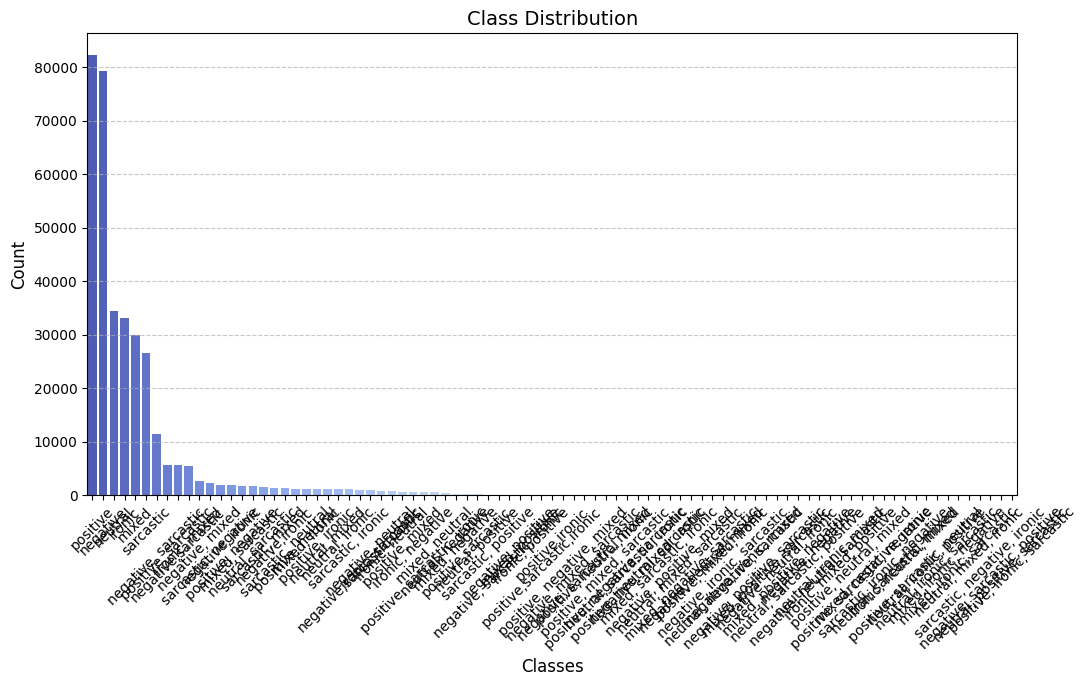

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords, words

# Plot class distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='classes', order=df['classes'].value_counts().index, palette='coolwarm')
plt.title("Class Distribution", fontsize=14)
plt.xlabel("Classes", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Visualize Most Common Words

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Luximano\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
C:\Users\Luximano\AppData\Local\Temp\ipykernel_9524\1141086509.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words], palette='viridis')


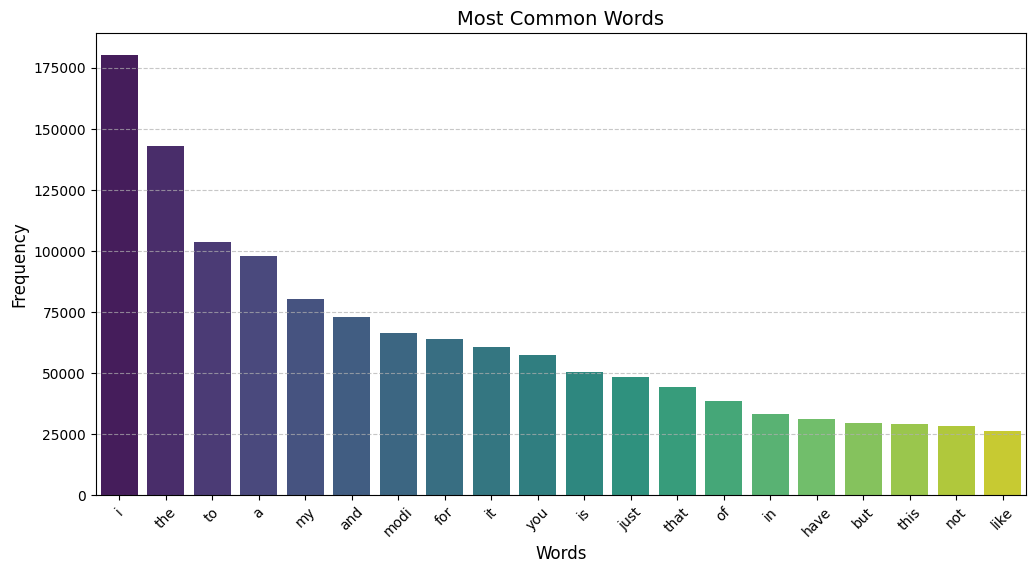

In [9]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

# Most common words
all_words = [word.lower() for text in df['tweet'].dropna() for word in word_tokenize(text) if word.isalpha()]
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)

# Bar plot of most common words
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words], palette='viridis')
plt.title("Most Common Words", fontsize=14)
plt.xlabel("Words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Distribution of Tweet Lengths

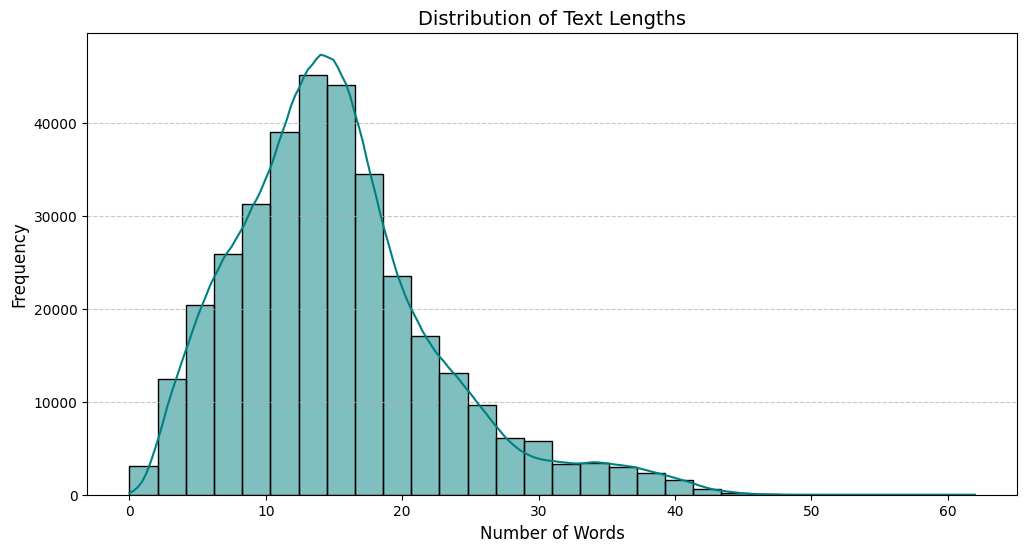

In [10]:
# Length of text distribution
plt.figure(figsize=(12, 6))
df['text_length'] = df['tweet'].apply(lambda x: len(x.split()))
sns.histplot(df['text_length'], bins=30, kde=True, color='teal')
plt.title("Distribution of Text Lengths", fontsize=14)
plt.xlabel("Number of Words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Word Clouds for Each Sentiment Label

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Luximano\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


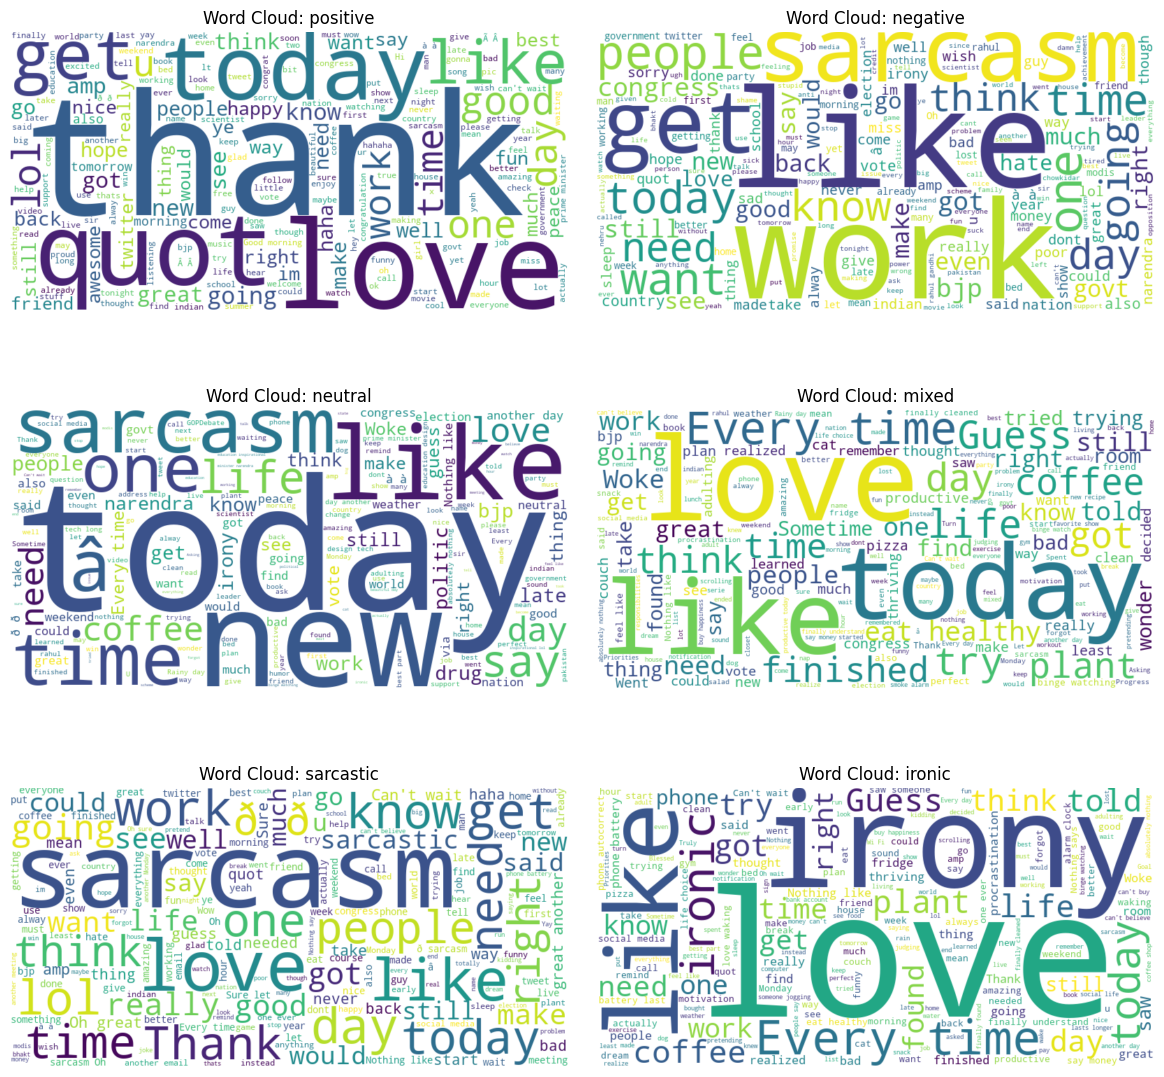

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import pandas as pd

# Download NLTK stopwords
nltk.download('stopwords')

# Define custom stopwords
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update(['india', 'modi'])  # unwanted words

# Preferred label display order 
ordered_labels = ['positive', 'negative', 'neutral', 'mixed', 'sarcastic', 'ironic']

# Set up subplot grid based on number of labels
cols = 2
rows = (len(ordered_labels) + cols - 1) // cols
plt.figure(figsize=(12, 4 * rows))

# Generate word cloud for each label in order
for i, class_label in enumerate(ordered_labels):
    # Filter tweets where the label is present in label_list
    class_tweets = df[df['label_list'].apply(lambda x: class_label in x)]['tweet']
    
    # Clean the tweets
    class_tweets = class_tweets.dropna().astype(str)
    text_corpus = ' '.join(class_tweets)

    # Skip if there's no text for this label
    if not text_corpus.strip():
        continue

    # Generate word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=custom_stopwords
    ).generate(text_corpus)

    # Plot in a subplot
    plt.subplot(rows, cols, i + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud: {class_label}", fontsize=12)

# Show the combined plot
plt.tight_layout(pad=2.0)
plt.show()